# BIG DATA 3 PROJECT : SNCF lost items
---------------------------------------------------------------------------------------------------------------------------
- ***SOULEYMANE FAYE, Magistère Ingénieur Economiste AMSE 1***
- ***MAX MICHEL KOFFI, Magistère Ingénieur Economiste AMSE 1***

1. Expliquer et définir chacune des 7 colonnes du fichier des objets trouvés.

Toutes les colonnes comportent des données de type objet sauf la colonne UIC qui est de type float 64 mais nous l'avons fait migrer vers le type objet en insérant "type={"Code UIC": str}" lors du chargement de la base  de données. La première colonne concerne la date à laquelle l'objet a été trouvé par un agent. La deuxième la date à laquelle l'objet a été restitué à son propriétaire, sachant qu'on ne trouve assez souvent jamais le propriétaire, il y aura des valeurs manquantes. La troisième est la gare où a été trouvé l'objet. La quatrième est le code UIC de référencement de l'objet, unique. La cinquième et sixième sont de simples classifications des objets trouvés, par nature et par type. La dernière colonne référence le motif d'enregistrement.

2. Charger le jeu de données en pandas. Remarquez-vous quelque chose au moment de chargement ?

Il semble que les données se chargent au préalable en une seule colonne. Pour éviter ce soucis, on précise le séparateur point virgule dans les arguments en mettant " sep=";" ".
On a changé  le type de "Code UIC" en string en mettant "type={"Code UIC": str}" et on a précisé que NaN correspond à des valeurs manquantes en mettant "na_values="_" ".

In [1]:
# On importe les bibliothèques nécessaires à l'analyse de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# On importe le jeu de données concernant les objets trouvés et parfois restitués
# On importe le jeu de données par un lien github. Du à la nécessité de stockage élevé, nous avons du utiliser Git LFS
url = 'https://media.githubusercontent.com/media/SFayeEcon/lost_items/main/objets-trouves-restitution.csv?token=AYA7U5FF6GKNCK3MEIKTTQTCI4R66'
found_items_df = pd.read_csv(url,
                             sep=";",dtype={"Code UIC": str},na_values="_")

In [3]:
# On visualise le jeu de données
found_items_df.head(8)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2019-08-12T11:44:21+02:00,NaN,Périgueux,0087595009,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé
1,2019-08-12T11:56:13+02:00,2019-08-20T12:22:04+02:00,Strasbourg,0087212027,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Objet trouvé
2,2019-08-12T12:21:06+02:00,NaN,Paris Gare de Lyon,0087686006,"Cartable, trousse d'écolier, dossier scolaire","Articles d'enfants, de puériculture",Objet trouvé
3,2019-08-12T12:23:53+02:00,NaN,Brest,0087474007,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé
4,2019-08-12T12:27:18+02:00,NaN,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
5,2019-08-12T12:35:39+02:00,2019-08-12T13:02:58+02:00,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
6,2019-08-12T12:40:13+02:00,NaN,Paris Montparnasse,0087391003,Lunettes,Optique,Objet trouvé
7,2019-08-12T12:47:04+02:00,NaN,Paris Montparnasse,0087391003,Autre pièce ou papier personnel,Pièces d'identités et papiers personnels,Objet trouvé


3. Décrire le jeu de données : donner les types, étudier les valeurs nulles, la cardinalité des différentes catégories, etc.

In [4]:
# Les types 
found_items_df.dtypes

Date                            object
Date et heure de restitution    object
Gare                            object
Code UIC                        object
Nature d'objets                 object
Type d'objets                   object
Type d'enregistrement           object
dtype: object

In [5]:
# Etude des valeurs nulles 
found_items_df.isnull().sum()

Date                                 0
Date et heure de restitution    455208
Gare                               291
Code UIC                           291
Nature d'objets                      0
Type d'objets                        0
Type d'enregistrement                0
dtype: int64

In [6]:
# Cardinalité des différentes catégories par colonne
for column in found_items_df.columns:
    print(found_items_df[column].value_counts());

2017-12-14T07:23:24+01:00    4
2017-07-04T07:29:58+02:00    4
2017-12-27T16:46:51+01:00    3
2017-07-03T17:51:03+02:00    3
2018-01-08T07:39:56+01:00    3
                            ..
2019-01-15T11:00:44+01:00    1
2014-09-17T10:20:16+02:00    1
2017-05-21T16:00:20+02:00    1
2021-04-12T09:58:44+02:00    1
2017-11-14T21:11:05+01:00    1
Name: Date, Length: 690070, dtype: int64
2021-11-12T12:00:00+01:00    4
2018-06-04T11:38:39+02:00    2
2018-01-11T10:37:42+01:00    2
2015-07-05T08:51:54+02:00    2
2014-05-28T11:31:59+02:00    2
                            ..
2020-01-29T09:38:06+01:00    1
2014-08-29T16:35:42+02:00    1
2020-01-29T14:59:38+01:00    1
2014-09-08T11:29:52+02:00    1
2017-11-22T12:13:59+01:00    1
Name: Date et heure de restitution, Length: 236613, dtype: int64
Paris Gare de Lyon    52717
Paris Montparnasse    49248
Paris Gare du Nord    40216
Strasbourg            31236
Paris Saint-Lazare    28815
                      ...  
Biarritz                 16
Thonon-les-Bains

4. Ce jeu de données contient deux colonnes de dates. Convertir ces colonnes en format de date plus utilisable pour la suite. C’est-à-dire un format où il est plus simple de récupérer l’année, le mois ou le jour par exemple.

In [7]:
# On ne garde que  les 10  premiers caractères dans la colonne "Date"
found_items_df["Date"]=found_items_df["Date"].apply(lambda x: str(x)[:10])

In [8]:
# On ne garde que  les 10 premiers caractères dans la colonne "Date et heure de restitution"
found_items_df["Date et heure de restitution"]=found_items_df["Date et heure de restitution"].apply(lambda x: str(x)[:10])

In [9]:
# On visualise le jeu de données
found_items_df.head(8)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2019-08-12,nan,Périgueux,0087595009,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé
1,2019-08-12,2019-08-20,Strasbourg,0087212027,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Objet trouvé
2,2019-08-12,nan,Paris Gare de Lyon,0087686006,"Cartable, trousse d'écolier, dossier scolaire","Articles d'enfants, de puériculture",Objet trouvé
3,2019-08-12,nan,Brest,0087474007,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé
4,2019-08-12,nan,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
5,2019-08-12,2019-08-12,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
6,2019-08-12,nan,Paris Montparnasse,0087391003,Lunettes,Optique,Objet trouvé
7,2019-08-12,nan,Paris Montparnasse,0087391003,Autre pièce ou papier personnel,Pièces d'identités et papiers personnels,Objet trouvé


In [10]:
# Conversion  de la  colonne Date en format de date plus utilisable pour la suite.
found_items_df["Date"] = pd.to_datetime(found_items_df["Date"])

In [11]:
# Conversion  de la  colonne Date et heure de restitution en format de date plus utilisable pour la suite.
found_items_df["Date et heure de restitution"] = pd.to_datetime(found_items_df["Date et heure de restitution"])

In [12]:
# Le type de Date et Date et heure de restitution a donc migré de object à Datetime64[ns]
found_items_df.dtypes

Date                            datetime64[ns]
Date et heure de restitution    datetime64[ns]
Gare                                    object
Code UIC                                object
Nature d'objets                         object
Type d'objets                           object
Type d'enregistrement                   object
dtype: object

In [13]:
# On visualise le jeu de données à la suite des deux opérations; NaT correspond aux valeurs manquantes relatives à un format datetime
found_items_df.head(8)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2019-08-12,NaT,Périgueux,0087595009,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé
1,2019-08-12,2019-08-20,Strasbourg,0087212027,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Objet trouvé
2,2019-08-12,NaT,Paris Gare de Lyon,0087686006,"Cartable, trousse d'écolier, dossier scolaire","Articles d'enfants, de puériculture",Objet trouvé
3,2019-08-12,NaT,Brest,0087474007,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé
4,2019-08-12,NaT,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
5,2019-08-12,2019-08-12,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé
6,2019-08-12,NaT,Paris Montparnasse,0087391003,Lunettes,Optique,Objet trouvé
7,2019-08-12,NaT,Paris Montparnasse,0087391003,Autre pièce ou papier personnel,Pièces d'identités et papiers personnels,Objet trouvé


5. Donner la date de début du jeu de données.


In [14]:
# On crée une nouvelle variable qui contient la première ligne du dataframe found_items par ordre croissant de date
first_item_found = found_items_df["Date"].sort_values().head(1)
# On affiche le résultat 
print(first_item_found)

319608   2013-05-24
Name: Date, dtype: datetime64[ns]


6. Dans cette question vous effectuerez l’analyse sur le jeu de données des objets trouvés mais aussi des objets déclarés perdus.

In [15]:
###On importe le jeu de données des objets déclarés perdus depuis le repository GitHub
url = 'https://media.githubusercontent.com/media/SFayeEcon/lost_items/main/objets-trouves-gares.csv?token=AYA7U5ESMYPFAAVX3LLR77TCI4VDC'
lost_items_df = pd.read_csv(url, sep=";", dtype={"Code UIC": str}, na_values="_")

In [16]:
###On visualise le jeu de données
lost_items_df.head(8)

,Date,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2018-09-04T06:22:57+02:00,Mulhouse,0087182063,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables",Déclaration de Perte
1,2017-03-22T09:20:50+01:00,NaN,NaN,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Déclaration de Perte
2,2018-09-04T06:33:38+02:00,Mulhouse,0087182063,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Déclaration de Perte
3,2017-03-22T09:27:02+01:00,NaN,NaN,Téléphone portable,"Appareils électroniques, informatiques, appare...",Déclaration de Perte
4,2018-09-04T08:46:31+02:00,Bourg-en-Bresse,0087743005,"Carte d'identité, passeport, permis de conduire",Pièces d'identités et papiers personnels,Déclaration de Perte
5,2017-03-22T09:29:02+01:00,NaN,NaN,Autres divers,Divers,Déclaration de Perte
6,2018-09-04T09:43:38+02:00,NaN,NaN,"Disque dur externe, clé USB","Appareils électroniques, informatiques, appare...",Déclaration de Perte
7,2017-03-22T09:30:24+01:00,NaN,NaN,"Attaché-case, serviette","Bagagerie: sacs, valises, cartables",Déclaration de Perte


In [17]:
# On ne garde que les 10  premiers caractères dans la colonne "Date"
lost_items_df["Date"] = lost_items_df["Date"].apply(lambda x: str(x)[:10])

In [18]:
# Conversion  de la  colonne Date en format de date plus utilisable pour la suite.
lost_items_df["Date"] = pd.to_datetime(lost_items_df["Date"])

In [19]:
# On visualise le jeu de données encore une fois après cette convertion
lost_items_df.head(8)

,Date,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2018-09-04,Mulhouse,0087182063,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables",Déclaration de Perte
1,2017-03-22,NaN,NaN,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Déclaration de Perte
2,2018-09-04,Mulhouse,0087182063,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Déclaration de Perte
3,2017-03-22,NaN,NaN,Téléphone portable,"Appareils électroniques, informatiques, appare...",Déclaration de Perte
4,2018-09-04,Bourg-en-Bresse,0087743005,"Carte d'identité, passeport, permis de conduire",Pièces d'identités et papiers personnels,Déclaration de Perte
5,2017-03-22,NaN,NaN,Autres divers,Divers,Déclaration de Perte
6,2018-09-04,NaN,NaN,"Disque dur externe, clé USB","Appareils électroniques, informatiques, appare...",Déclaration de Perte
7,2017-03-22,NaN,NaN,"Attaché-case, serviette","Bagagerie: sacs, valises, cartables",Déclaration de Perte


6a. Donner l’année, le mois et le jour de la semaine où il y a le plus d’objets trouvés et déclarés perdus. Créer des graphique en colonnes affichant le résultat.

6a-i objets trouves 

In [20]:
# l’année, le mois et le jour de la semaine où il y a le plus d’objets trouvés
# Date_max_found_items_df=found_items_df.groupby("Date")["Type d'enregistrement"].value_counts().sort_values(ascending=False).head(1)

print("date:", found_items_df['Date'].value_counts(ascending=False).head(1))
print("année:", found_items_df['Date'].dt.year.value_counts(ascending=False).head(1))
print("mois:", found_items_df['Date'].dt.month.value_counts(ascending=False).head(1))
print("jour de la semaine:", found_items_df['Date'].dt.day_name().value_counts(ascending=False).head(1));

date: 2014-07-15    626
Name: Date, dtype: int64
année: 2015    98578
Name: Date, dtype: int64
mois: 7    69660
Name: Date, dtype: int64
jour de la semaine: Monday    142704
Name: Date, dtype: int64


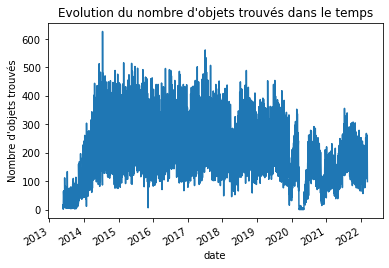

In [21]:
#Date_max_found_items_df.plot(kind="bar", xlabel='Date', ylabel='Number of items found', 
#                             title='Date on which the most items are found',color='maroon')

found_items_df['Date'].value_counts().sort_values().plot(title="Evolution du nombre d'objets trouvés dans le temps", xlabel="date", ylabel="Nombre d'objets trouvés");

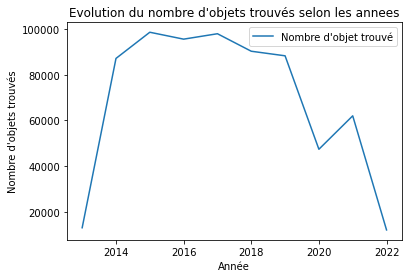

In [22]:
# 
found_items_df['Annee'] = found_items_df['Date'].dt.year

(found_items_df.groupby("Annee")[["Annee"]] # groupement par date et projection sur la colonne "Date"
  .size() # aggrégation: compter les lignes
  .to_frame("Nombre d'objet trouvé") # renommage de la colonne de comptage
  #.reset_index() # réinitialisation de l'index (qui était "Annee" après les étapes précédentes)
  .plot(title="Evolution du nombre d'objets trouvés selon les annees", xlabel="Année", ylabel="Nombre d'objets trouvés")
);

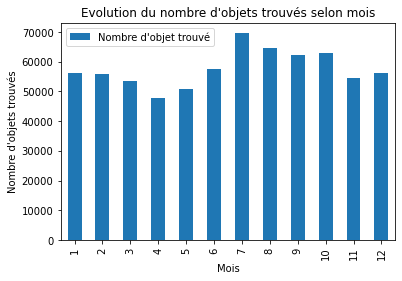

In [23]:
found_items_df['Mois'] = found_items_df['Date'].dt.month

(found_items_df.groupby("Mois")[["Mois"]] # groupement par date et projection sur la colonne "Date"
  .size() # aggrégation: compter les lignes
  .to_frame("Nombre d'objet trouvé") # renommage de la colonne de comptage
  #.reset_index() # réinitialisation de l'index (qui était "Annee" après les étapes précédentes)
  .plot(title="Evolution du nombre d'objets trouvés selon mois", xlabel="Mois", ylabel="Nombre d'objets trouvés", kind='bar')
);

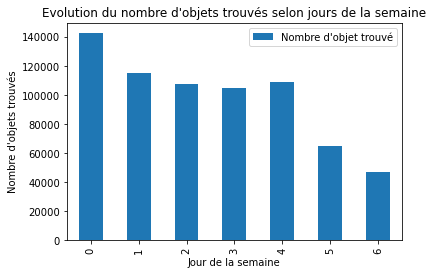

In [24]:
found_items_df['Jour'] = found_items_df['Date'].dt.weekday

(found_items_df.groupby("Jour")[["Jour"]] # groupement par date et projection sur la colonne "Date"
  .size() # aggrégation: compter les lignes
  .to_frame("Nombre d'objet trouvé") # renommage de la colonne de comptage
  #.reset_index() # réinitialisation de l'index (qui était "Annee" après les étapes précédentes)
  .plot(title="Evolution du nombre d'objets trouvés selon jours de la semaine", xlabel="Jour de la semaine", ylabel="Nombre d'objets trouvés", kind='bar')
);

6a-ii objets déclarés perdus

In [25]:
# l’année, le mois et le jour de la semaine où il y a le plus d’objets déclarés perdus

print("date:", lost_items_df['Date'].value_counts(ascending=False).head(1))
print("année:", lost_items_df['Date'].dt.year.value_counts(ascending=False).head(1))
print("mois:", lost_items_df['Date'].dt.month.value_counts(ascending=False).head(1))
print("jour de la semaine:", lost_items_df['Date'].dt.day_name().value_counts(ascending=False).head(1));

date: 2017-07-10    905
Name: Date, dtype: int64
année: 2017    192929
Name: Date, dtype: int64
mois: 7    133327
Name: Date, dtype: int64
jour de la semaine: Monday    258258
Name: Date, dtype: int64


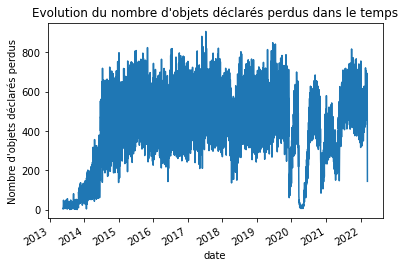

In [26]:
(lost_items_df['Date']
  .value_counts()
  .sort_values()
  .plot(title="Evolution du nombre d'objets déclarés perdus dans le temps", 
        xlabel="date", ylabel="Nombre d'objets déclarés perdus")
);

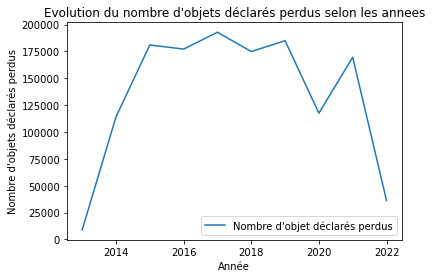

In [27]:
lost_items_df['Annee'] = lost_items_df['Date'].dt.year

(lost_items_df.groupby("Annee")[["Annee"]] # groupement par date et projection sur la colonne "Date"
  .size() # aggrégation: compter les lignes
  .to_frame("Nombre d'objet déclarés perdus") # renommage de la colonne de comptage
  .plot(title="Evolution du nombre d'objets déclarés perdus selon les annees", xlabel="Année", ylabel="Nombre d'objets déclarés perdus")
);

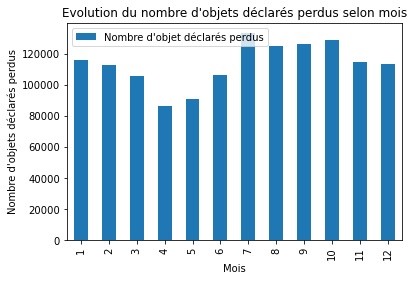

In [28]:
lost_items_df['Mois'] = lost_items_df['Date'].dt.month

(lost_items_df.groupby("Mois")[["Mois"]] # groupement par date et projection sur la colonne "Date"
  .size() # aggrégation: compter les lignes
  .to_frame("Nombre d'objet déclarés perdus") # renommage de la colonne de comptage
  .plot(title="Evolution du nombre d'objets déclarés perdus selon mois", xlabel="Mois", ylabel="Nombre d'objets déclarés perdus", kind='bar')
);

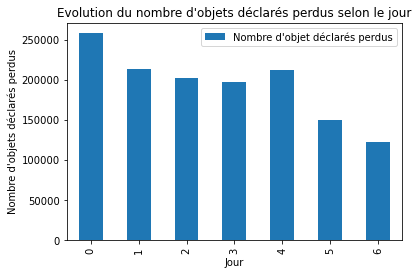

In [29]:
lost_items_df['Jour'] = lost_items_df['Date'].dt.weekday

(lost_items_df.groupby("Jour")[["Jour"]] # groupement par date et projection sur la colonne "Date"
  .size() # aggrégation: compter les lignes
  .to_frame("Nombre d'objet déclarés perdus") # renommage de la colonne de comptage
  .plot(title="Evolution du nombre d'objets déclarés perdus selon le jour", xlabel="Jour", ylabel="Nombre d'objets déclarés perdus", kind='bar')
);

b. Tracer trois courbes affichant l’évolution du nombres d’objets déclarés perdus, trouvés et 
restitués depuis le début du jeu de donnée.

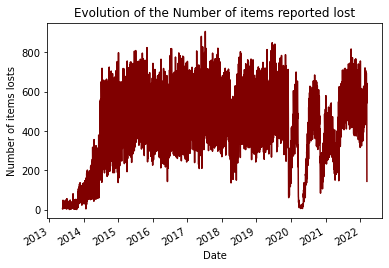

In [30]:
# l’évolution du nombres d’objets déclarés perdus depuis le début du jeu de donnée
lost_items_per_date_df = lost_items_df["Date"].value_counts().sort_values(ascending=True)
lost_items_per_date_df.plot(xlabel="Date", 
                            ylabel="Number of items losts", 
                            title='Evolution of the Number of items reported lost',color='maroon');

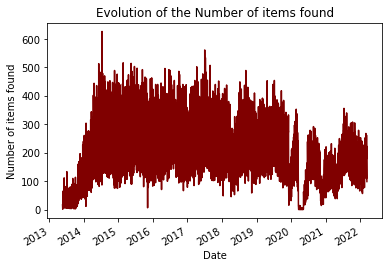

In [31]:
# L’évolution du nombres d’objets trouvés depuis le début du jeu de donnée
found_items_per_date_df=found_items_df["Date"].value_counts().sort_values(ascending=True)
found_items_per_date_df.plot(xlabel='Date', 
                             ylabel='Number of items found',
                             title='Evolution of the Number of items found',color='maroon');

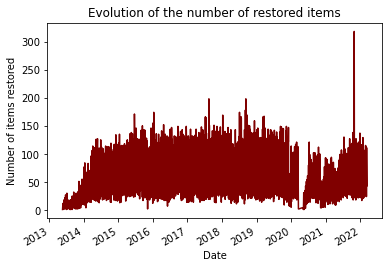

In [32]:
# Graphique de l'évolution du nombre d'objets restitués
# la colonne "Objet restitué" a été créée dans la question 7
restored_items_per_date=found_items_df["Date et heure de restitution"].value_counts()
restored_items_per_date.plot(xlabel='Date', 
                             ylabel='Number of items restored', 
                             title = 'Evolution of the number of restored items',color='maroon');

7. Trouver les 3 gares où il y a le plus d’objets restitués en pourcentage des objets trouvés.

In [33]:
# Répartition des objets trouvés par gare
found_items_per_station = found_items_df["Gare"].value_counts()
print(found_items_per_station)

Paris Gare de Lyon    52717
Paris Montparnasse    49248
Paris Gare du Nord    40216
Strasbourg            31236
Paris Saint-Lazare    28815
                      ...  
Biarritz                 16
Thonon-les-Bains         15
Lille Flandres            9
Bar-le-Duc                7
Forbach                   1
Name: Gare, Length: 181, dtype: int64


In [34]:
# Création d'une colonne "Objet restitué" prenant la valeur 0 si la valeur est manquante dans la colonne "Date et heure de restitution" et 1 sinon 
found_items_df["Objet restitué"] = found_items_df["Date et heure de restitution"].apply(lambda x: 0 if pd.isnull(x) else 1)
# Visualisation des données afin de verifier l'existence ainsi que les valeurs de la nouvelle colonne"
found_items_df.head(5)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement,Annee,Mois,Jour,Objet restitué
0,2019-08-12,NaT,Périgueux,0087595009,Téléphone portable,"Appareils électroniques, informatiques, appare...",Objet trouvé,2019,8,0,0
1,2019-08-12,2019-08-20,Strasbourg,0087212027,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Objet trouvé,2019,8,0,1
2,2019-08-12,NaT,Paris Gare de Lyon,0087686006,"Cartable, trousse d'écolier, dossier scolaire","Articles d'enfants, de puériculture",Objet trouvé,2019,8,0,0
3,2019-08-12,NaT,Brest,0087474007,"Manteau, veste, blazer, parka, blouson, cape","Vêtements, chaussures",Objet trouvé,2019,8,0,0
4,2019-08-12,NaT,Paris Gare de Lyon,0087686006,Sac à dos,"Bagagerie: sacs, valises, cartables",Objet trouvé,2019,8,0,0


In [35]:
# Les 3 gares où il y a le plus d’objets restitués en pourcentage des objets trouvés.
restitued_items_per_station = found_items_df.groupby("Gare")["Objet restitué"].mean().sort_values(ascending=False).head(3) * 100
print(restitued_items_per_station)

Gare
Bellegarde         63.825758
Dieppe             62.376238
Bourg-en-Bresse    62.137203
Name: Objet restitué, dtype: float64


8. L’objectif de cette question est d’afficher sur une carte de France un diagramme en bulle avec le volume d’objets déclarés perdus par gare

a. Calculer le volume d’objets déclarés perdus par gare

In [36]:
# On affecte une nouvelle variable qui mesure le volume d’objets déclarés perdus par gare
# lost_items_per_station = lost_items_df["Gare"].value_counts().to_frame("Nombre d'objet perdus").reset_index(col_fill="Gare")

lost_items_per_station_df = (lost_items_df # restriction sur les campings
                 .groupby("Gare")[["Gare"]] # groupement par région et projection sur la colonne "TYPOLOGIE ÉTABLISSEMENT"
                 .size() # aggrégation: compter les lignes
                 .to_frame("Nombre d'objet perdus") # renommage de la colonne de comptage
                 .reset_index() # réinitialisation de l'index (qui était REGION après les étapes précédentes)
                )

# Voici ce que nous donne maintenant cette variable
lost_items_per_station_df.head()

,Gare,Nombre d'objet perdus
0,Abbeville,35
1,Agen,1173
2,Aix-en-Provence TGV,1454
3,Aix-les-Bains le Revard,80
4,Alençon,67


b. Associer à chaque gare une position GPS pour pouvoir l’afficher sur la carte

In [37]:
# Installation de la librairie geopy pour travailler avec les coordonnées GPS
!pip install geopy

  Using cached geopy-2.2.0-py3-none-any.whl (118 kB)
  Using cached geographiclib-1.52-py3-none-any.whl (38 kB)


Remarque : Pour la localisation, nous avons d'abord travaillé longuement sur la première méthode. 
Cependant, la question b paraissait complexe avec celle-ci.
Nous avons alors utilisé une autre méthode (la deuxième).
Nous avons décidé de laisser le code pour montrer nos difficultés et comment s'est développé notre travail.

In [38]:
# Première méthode pour affecter les coordonnées gps à chaque gare
# On importe le nécessaire pour obtenir une localisation à partir des gares.
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="Gare")
#from geopy.extra.rate_limiter import RateLimiter
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# Ensuite, on affecte à chaque gare une adresse sous la colonne locations 
# Puis un couple de coordonnées GPS sous la colonne point
#df['locations'] = df['Gare'].apply(geocode)
#df['point'] = df['locations'].apply(lambda loc: tuple(loc.point) if loc else None)

Cette première méthode est chronophage (3mn 13s pour l'exécution), une autre méthode plus rapide serait intéressante. Sur un volume encore plus important de données, cela aurait posé problème.

In [39]:
# Deuxième méthode pour affecter les coordonnées gps à chaque gare
# On importe le nécessaire pour obtenir une localisation à partir des gares.
from geopy.geocoders import Nominatim 
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance
geocoder = RateLimiter(Nominatim(user_agent="Gare").geocode, min_delay_seconds=1)
lost_items_per_station_df["location"] = lost_items_per_station_df["Gare"].apply(geocoder)

# On ajoute la latitude et la longitude à notre dataframe
lost_items_per_station_df["latitude"] = lost_items_per_station_df["location"].apply(lambda loc: loc.latitude if loc else None)
lost_items_per_station_df["longitude"] = lost_items_per_station_df["location"].apply(lambda loc: loc.longitude if loc else None)

In [40]:
# On obtient donc trois nouvelles colonnes, location, latitude, longitude
lost_items_per_station_df.head()

,Gare,Nombre d'objet perdus,location,latitude,longitude
0,Abbeville,35,"(Abbeville, Somme, Hauts-de-France, France mét...",50.106083,1.833703
1,Agen,1173,"(Agen, Lot-et-Garonne, Nouvelle-Aquitaine, Fra...",44.201583,0.617611
2,Aix-en-Provence TGV,1454,"(Aix-en-Provence TGV, D 9, Cabriès, Aix-en-Pro...",43.455145,5.317287
3,Aix-les-Bains le Revard,80,"(Aix-les-Bains-Le Revard, Rue Édouard Colonne,...",45.688138,5.908928
4,Alençon,67,"(Alençon, Orne, Normandie, France métropolitai...",48.431206,0.091137


Cette deuxième est plus chronophage (3 minutes 53 secondes) mais nous permet d'avoir directement deux colonnes 
pour les coordonnées GPS, ce qui sera mieux pour la suite.

In [41]:
# Vérifions si on a réussi à obtenir la localisation de toutes les gares
lost_items_per_station_df.isna().sum()

Gare                     0
Nombre d'objet perdus    0
location                 2
latitude                 2
longitude                2
dtype: int64

Remarque : les localisations et positions semblent être bonnes. Cependant, pour trois gares, geopy ne nous renvoie pas de localisation et de position.

In [42]:
# On supprime les lignes pour lesquelles nous n'avons pas de localisation  
lost_items_per_station_df = lost_items_per_station_df.dropna() 
# On vérifie qu'il n'y a bien plus aucune valeur manquante dans le dataframe
lost_items_per_station_df.isna().sum()
# Raison : Pour afficher les données sur la carte, il nous faut un dataframe où les informations de localisations sont complètes.

Gare                     0
Nombre d'objet perdus    0
location                 0
latitude                 0
longitude                0
dtype: int64

c. Afficher la donnée sur la carte — si plusieurs bulles se superposent trop sur une ville vous pouvez aussi essayer de faire un affichage différent ou de fusionner les bulles

In [43]:
# On installe la bibliothèque de data visualisation sur carte
!pip install folium

  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [44]:
# On importe la bibliothèque de data visualisation sur carte
import folium
# Création de notre carte avec les coordonnées de la France.
map_france = folium.Map(location=[46.227638, 2.213749], zoom_start=6)
# Visualisation
map_france

In [45]:
# On crée deux nouvelles variables de localisation pour simplifier le code par la suite
lost_items_per_station_df['coordonnees'] = tuple(zip(lost_items_per_station_df['latitude'], lost_items_per_station_df['longitude']))

In [46]:
# On affiche les données sur la carte
###for gare in lost_items_per_station_df['Gare']:
#    folium.CircleMarker(lost_items_per_station_df['coordonnees'],
#            lost_items_per_station_df["Number of items losts"],
#            popup=lost_items_per_station_df['Gare'],
#            color='#3186cc',
#            fill_color='#3186cc',
#    ).add_to(map_france)
###

for lat, lng, location, volume  in zip(lost_items_per_station_df['latitude'],
                            lost_items_per_station_df['longitude'],
                            lost_items_per_station_df['location'],
                            lost_items_per_station_df["Nombre d'objet perdus"]
                            ):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker([lat, lng],
    radius=volume/1000,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.2,
    parse_html=False).add_to(map_france) 

In [47]:
map_france

d. Bonus — Ajouter un sélecteur de “type d’objets” pour avoir une carte par catégorie

9. Question libre — Dans cette question vous avez carte libre. Visualisation, calcul ou transformation. Creuser et trouver quelque chose d’intéressant dans la donnée.

*Objectif pour la question libre* :  Dans cette question, nous allons mener une analyse de séries temporelles sur le nombre d'objets perdus à l'aide du dataframe du fichier objets-trouves-gares.csv nommé lost_items.
Notre but est donc d'effectuer du machine learning mais cette fois ci dans un cadre temporel.

In [48]:
# On calcule le nombre d'objets déclarés perdus par date
lost_items_time_series_df=lost_items_df["Date"].value_counts().sort_values(ascending=True)
# On affecte l'index de base
lost_items_time_series_df=lost_items_time_series_df.rename_axis('index').reset_index()
# on change le nom des colonnes du dataframe
lost_items_time_series_df=lost_items_time_series_df.rename(columns = {'Date': 'Number of items lost', 'index':'Date'})
# On classe le dataframe dans l'ordre chronologique
lost_items_time_series_df=lost_items_time_series_df.sort_values(by="Date")
# On place la date en index
lost_items_time_series_df=lost_items_time_series_df.set_index('Date')
# Visualisation
lost_items_time_series_df

,Number of items lost
Date,
2013-05-24,6
2013-05-25,3
2013-05-26,4
2013-05-27,18
2013-05-28,21
...,...
2022-03-09,540
2022-03-10,573
2022-03-11,642


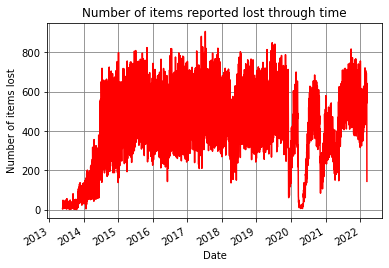

In [49]:
# Let's plot Number of items reported losts through time
lost_items_time_series_df["Number of items lost"].plot(title = "Number of items reported lost through time", 
                                                       xlabel="Date", ylabel="Number of items lost", 
                                                       color='red', grid=True, kind='line') 
# On change la couleur du quadrillage
plt.grid(color='grey')

<AxesSubplot:title={'center':'Lost items Distribution'}, ylabel='Density'>

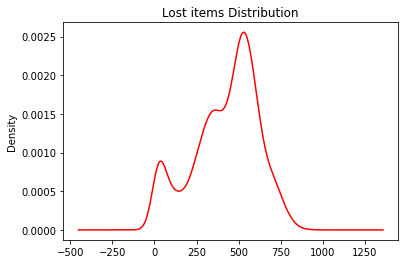

In [50]:
# Distribution of our dataset 
lost_items_time_series_df["Number of items lost"].plot(kind='kde', title="Lost items Distribution", 
                      xlabel="Number of items losts", ylabel='Density', color='red')

Nous allons tenter de modéliser le nombre d'objets perdus par un modèle autorégressif d'ordre p 

In [51]:
!pip install AutoReg

  Created wheel for AutoReg: filename=AutoReg-1.1-py3-none-any.whl size=3660 sha256=10b865e2bb66b33ec2d9ef8ad47f4f19b60ea753d831e3c4141ba6afea06e59d
  Stored in directory: c:\users\yedidia agnimo\appdata\local\pip\cache\wheels\f0\27\64\b6695ba4e73b3160f2612f6e63e0ab40e305545b38df057fb8
Successfully built AutoReg


In [52]:
# Load AutoReg class from statsmodels.tsa.ar_model module

from statsmodels.tsa.ar_model import AutoReg

Un modèle autorégressif n'est valable que pour les séries stationnaires. Il est alors nécessaire d'effectuer un test de de stationnarité de Dickey-Fuller pour vérifier si nos données le sont effectivement.

In [53]:
# Let's run a stationnary Dickey-Fuller test
# The null hypothesis is that our data is stationnary, the alternative is our data is not

#Import Dickey-Fuller test library 
from statsmodels.tsa.stattools import adfuller

# We run the test
df_stationarityTest = adfuller(lost_items_time_series_df['Number of items lost'], autolag='AIC')

# Check the value of p-value
print("p-value: ", df_stationarityTest[1])

# We conclude by comparing the p-value to our statistical value (0.05)
if df_stationarityTest[1]<0.05: 
    print("The p-value is clearly above 0.05, we don't reject the null hypothesis, our data may be stationnary")  
else:
    print("The p-value is clearly below 0.05, we reject the null hypothesis, our data is not stationnary")

p-value:  0.010498725043735571
The p-value is clearly above 0.05, we don't reject the null hypothesis, our data may be stationnary


In [54]:
import statsmodels.api as sm

# load data series
data = sm.datasets.sunspots.load_pandas().data;

# fit ARMA model to dataset
res = sm.tsa.ARMA(lost_items_time_series_df["Number of items lost"], (1,1)).fit(disp=-1);

# perform Ljung-Box test on residuals with lag=10
sm.stats.acorr_ljungbox(x=res.resid, lags=[10])


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

(array([2521.83350728]), array([0.]))

### We conclude by comparing the p-value to our statistical value (0.05)
if lb_stat<0.05: 
- Thus, our p-value is clearly above 0.05, we don't reject the null hypothesis, the residuals of our data are not independant

if lb_stat>0.05:
- Thus, p-value is clearly below 0.05, we reject the null hypothesis, the residuals are independant

La statistique de test est 395.395217 et la p-value 2.915254e-83.
On peut alors rejeter l'hypothèse nulle et en conclure que les résidus ne sont pas indépendants. La série est donc un bruit blanc. 

Nous avons effectué un test de stationnarité, puis un test de bruit blanc, les deux étants concluants. On peut alors en conclure que le nombre d'objets déclarés perdus dépend du nombre antérieur d'objets déclarés perdus. On a une bonne robustesse pour l'estimation d'un modèle de time series avec ce jeu de données.

Ensuite, il est nécessaire de dessiner le PACF (Partial Autocorrelation Function) d'ou on peut déterminer l'ordre p avec lequel on va estimer notre série temporelle.

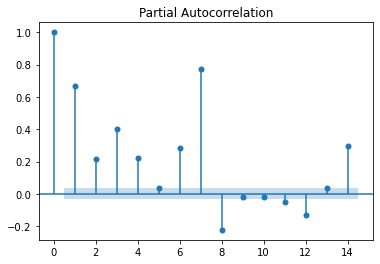

In [55]:
# Let's plot the partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(lost_items_time_series_df['Number of items lost'], lags=14)

Ce graphe nous donne les coefficients d'autocorrélation pour chaque ordre. Il sera donc pertinent de choisir pour notre estimation l'ordre juste avant celui qui s'approche de la valeur nulle. Ici, c'est l'ordre 8.
Il semble que l'on peut estimer un modèle AR(8) pour cette série !

In [56]:
# Instantiate and fit the AR(8) model with training data
ar_model = AutoReg(lost_items_time_series_df['Number of items lost'], lags=8).fit()
# Print results
print(ar_model.summary())

                             AutoReg Model Results                              
Dep. Variable:     Number of items lost   No. Observations:                 3215
Model:                       AutoReg(8)   Log Likelihood              -18359.372
Method:                 Conditional MLE   S.D. of innovations             74.132
Date:                  Fri, 08 Apr 2022   AIC                              8.618
Time:                          23:44:41   BIC                              8.637
Sample:                               8   HQIC                             8.625
                                   3215                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                  12.0207      3.710      3.240      0.001       4.749      19.292
Number of items lost.L1     0.2559      0.017     14.733      0.000       0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Nous avons enfin les résultats de notre estimation. Les coefficients sont interprétables, mais aussi le log-likelihood pour comparer à un autre modèle (ARMA(p,q) par exemple), les standard errors également.

Ensuite, nous allons utiliser notre modèle autorégressif pour le prévision.

In [57]:
# Le modèle AR(p=8) équivaut au modèle ARMA(p=8,q=0)
# On se sert de cette propriété pour utiliser un code différent pour la prévision
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(lost_items_time_series_df, order=(8,0))
res = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

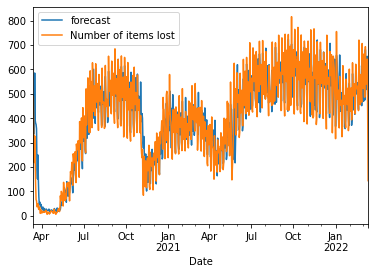

In [58]:
# Voici la capacité de prédiction du modèle
# On utilise une période de temps plus courte car sinon on manque de visbilité
res.plot_predict(start='2020-03-13', end='2022-03-13')
plt.show()

D'après le graphe, nous observons une bonne prédiction du modèle AR(8) !

In [59]:
# Observons les prédictions du modèle pour les valeurs suivantes
res.predict(start=3214, end=8035)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


3214    482.219780
3215    578.837349
3216    569.455769
3217    507.271122
3218    540.429245
           ...    
8031    399.783823
8032    399.783823
8033    399.783823
8034    399.783823
8035    399.783823
Length: 4822, dtype: float64

On observe d'abord une croissance du nombre estimé d'objets déclarés perdus, mais à terme, il semble que celui-ci baisse fortement jusqu'à atteindre 398.

On observe également que le nombre d'objets déclarés perdus dans l'estimation du modèle AR(1) atteint sa valeur stationnaire dans un horizon assez lointain, en valeur d'index 8035. 

In [60]:
# Les valeurs suivantes prédites suivantes sont les mêmes, c'est bien la valeur stationnaire
res.predict(start=3214, end=15000)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


3214     482.219780
3215     578.837349
3216     569.455769
3217     507.271122
3218     540.429245
            ...    
14996    399.783823
14997    399.783823
14998    399.783823
14999    399.783823
15000    399.783823
Length: 11787, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


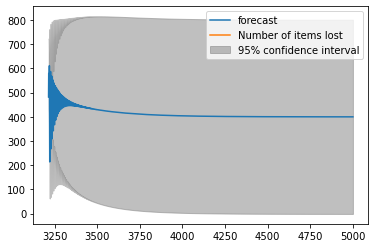

In [61]:
# Voyons maintenant en terme de prévision sur le graphe
res.plot_predict(start=3214, end=5000)
plt.show()

On observe une forte volatilité pour le nombre d'objets déclarés perdus au départ, mais celle-ci est résorbé assez rapidement, après la environ vers 3500, la valeur estimée pour la période correspondant à cet index 3500.  

10. Créer un modèle de machine learning qui pourra prédire le nombre d’objets perdus en 2022. Cette question a les contours volontairement flous, c’est à vous de les définir.

In [62]:
# utiliser la librairie scikit-learn ici

11. Bonus — Produire une image PNG au format 2000 x 2000 qui affiche les résultats à toutes les questions précédentes.

In [63]:
# Utiliser la librairie pil ici 